In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER


In [5]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0, 73)]

In [6]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (10, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (11, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (12, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (13, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f170f653470>,
 'tobs': 65,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
one_year = timedelta(days=365)
one_year_prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > (datetime.datetime.today()-one_year)).all()

In [12]:
prcp_df=pd.DataFrame(one_year_prcp)
prcp_df.head()

date  prcp
0  2017-05-27  0.01
1  2017-05-28  0.02
2  2017-05-29  0.00
3  2017-05-30  0.26
4  2017-05-31  0.02

In [13]:
prcp_df.columns

Index(['date', 'prcp'], dtype='object')

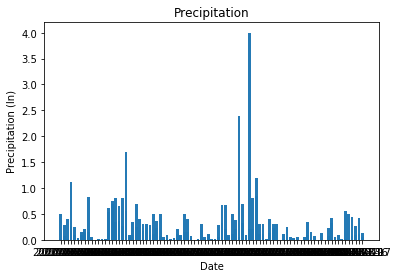

In [14]:
#Plot the prcp data against date
### BEGIN SOLUTION

x_axis = prcp_df['date']
y_axis = prcp_df['prcp']
 
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Precipitation (In)')
plt.title('Precipitation')
 
plt.show()

In [15]:
prcp_df.describe()

prcp
count  2422.000000
mean      0.109125
std       0.278618
min       0.000000
25%       0.000000
50%       0.020000
75%       0.100000
max       4.000000

In [20]:
total_stations = session.query(Measurement.date, Measurement.station).\
                         distinct(Measurement.station).group_by(Measurement.station).count()

total_stations

9

In [39]:
dates = session.query(Measurement.date).order_by(Measurement.date).all()
dates[-1]

('2017-08-23')

In [25]:
station_activities_overall = session.query(Measurement.station, func.count(Measurement.station)).\
                      group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activities_overall

[('USC00519281', 13860),
 ('USC00519397', 13581),
 ('USC00513117', 13532),
 ('USC00519523', 13248),
 ('USC00516128', 12932),
 ('USC00514830', 10745),
 ('USC00511918', 9848),
 ('USC00517948', 6171),
 ('USC00518838', 2386)]

In [27]:
station_activities_overall[0]

('USC00519281', 13860)

In [41]:
last12_tobs = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
               filter(Measurement.date.between('2016-08-24', '2017-08-23')).\
               group_by(Measurement.date).order_by(Measurement.date).all()

temps_df = pd.DataFrame(last12_tobs, columns = ['date', 'station', 'tobs'])[0:]
temps_df

date      station  tobs
0    2016-08-24  USC00516128    74
1    2016-08-25  USC00516128    77
2    2016-08-26  USC00519281    80
3    2016-08-27  USC00519281    75
4    2016-08-28  USC00516128    71
5    2016-08-29  USC00516128    78
6    2016-08-30  USC00516128    75
7    2016-08-31  USC00516128    76
8    2016-09-01  USC00516128    77
9    2016-09-02  USC00516128    75
10   2016-09-03  USC00516128    75
11   2016-09-04  USC00516128    73
12   2016-09-05  USC00516128    76
13   2016-09-06  USC00516128    73
14   2016-09-07  USC00516128    74
15   2016-09-08  USC00516128    74
16   2016-09-09  USC00516128    75
17   2016-09-10  USC00516128    75
18   2016-09-11  USC00516128    71
19   2016-09-12  USC00516128    72
20   2016-09-13  USC00516128    75
21   2016-09-14  USC00516128    73
22   2016-09-15  USC00516128    73
23   2016-09-16  USC00516128    73
24   2016-09-17  USC00516128    76
25   2016-09-18  USC00516128    75
26   2016-09-19  USC00516128    70
27   2016-09-20  USC00516128    70
28   2016-09-21  USC00516128    73
29   2016-09-22  USC00516128    73
..          ...          ...   ...
335  2017-07-25  USC00516128    79
336  2017-07-26  USC00516128    73
337  2017-07-27  USC00516128    75
338  2017-07-28  USC00516128    73
339  2017-07-29  USC00516128    77
340  2017-07-30  USC00516128    79
341  2017-07-31  USC00516128    74
342  2017-08-01  USC00519523    75
343  2017-08-02  USC00516128    80
344  2017-08-03  USC00516128    76
345  2017-08-04  USC00519281    77
346  2017-08-05  USC00519281    82
347  2017-08-06  USC00519281    83
348  2017-08-07  USC00516128    78
349  2017-08-08  USC00516128    74
350  2017-08-09  USC00516128    71
351  2017-08-10  USC00516128    75
352  2017-08-11  USC00519523    81
353  2017-08-12  USC00516128    74
354  2017-08-13  USC00519281    77
355  2017-08-14  USC00516128    79
356  2017-08-15  USC00516128    70
357  2017-08-16  USC00516128    71
358  2017-08-17  USC00516128    72
359  2017-08-18  USC00519281    79
360  2017-08-19  USC00516128    71
361  2017-08-20  USC00514830    80
362  2017-08-21  USC00516128    76
363  2017-08-22  USC00516128    76
364  2017-08-23  USC00516128    76

[365 rows x 3 columns]

In [45]:
highest_tobs_list = session.query(Measurement.tobs).filter(Measurement.date.between('2016-08-24', '2017-08-23')).\
                    filter(Measurement.station=='USC00519281').all()
temperature_list = [x[0] for x in highest_tobs_list]
temperature_list

[77,
 80,
 80,
 75,
 73,
 78,
 77,
 78,
 80,
 80,
 78,
 78,
 78,
 73,
 74,
 80,
 79,
 77,
 80,
 76,
 79,
 75,
 79,
 78,
 79,
 78,
 78,
 76,
 74,
 77,
 78,
 79,
 79,
 77,
 80,
 78,
 78,
 78,
 77,
 79,
 79,
 79,
 79,
 75,
 76,
 73,
 72,
 71,
 77,
 79,
 78,
 79,
 77,
 79,
 77,
 78,
 78,
 78,
 78,
 77,
 74,
 75,
 76,
 73,
 76,
 74,
 77,
 76,
 76,
 74,
 75,
 75,
 75,
 75,
 71,
 63,
 70,
 68,
 67,
 77,
 74,
 77,
 76,
 76,
 75,
 76,
 75,
 73,
 75,
 73,
 75,
 74,
 75,
 74,
 75,
 73,
 75,
 73,
 73,
 74,
 70,
 72,
 70,
 67,
 67,
 69,
 70,
 68,
 69,
 69,
 66,
 65,
 68,
 62,
 75,
 70,
 69,
 76,
 76,
 74,
 73,
 71,
 74,
 74,
 72,
 71,
 72,
 74,
 69,
 67,
 72,
 70,
 64,
 63,
 63,
 62,
 70,
 70,
 62,
 62,
 63,
 65,
 69,
 77,
 70,
 74,
 69,
 72,
 71,
 69,
 71,
 71,
 72,
 72,
 69,
 70,
 66,
 65,
 69,
 68,
 68,
 68,
 59,
 60,
 70,
 73,
 75,
 64,
 59,
 59,
 62,
 68,
 70,
 73,
 79,
 75,
 65,
 70,
 74,
 70,
 70,
 71,
 71,
 71,
 69,
 61,
 67,
 65,
 72,
 71,
 73,
 72,
 77,
 73,
 67,
 62,
 64,
 67,
 66,
 81,


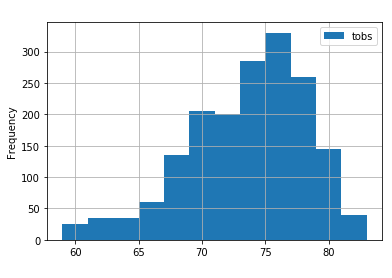

In [44]:
plt.hist(temperature_list, bins=12)
plt.grid(True)
plt.xlabel(" ")
plt.ylabel("Frequency")
plt.title(" ")
plt.legend(["tobs"])
plt.show()

In [47]:
def calc_temps (date1, date2):
    decon = date1.split('-')
    month1 = decon[1]
    day1 = decon[2]
    decon2 = date2.split('-')
    month2 = decon[1]
    day2 = decon[2]
    start_date = '2017-' + month1 + '-' + day1
    end_date = '2017-' + month2 + '-' + day2
    min_temp = session.query(func.min(Measurement.tobs)).\
               filter(Measurement.date.between(start_date, end_date)).first()
    avg_temp = session.query(func.avg(Measurement.tobs)).\
               filter(Measurement.date.between(start_date, end_date)).first()
    max_temp = session.query(func.max(Measurement.tobs)).\
               filter(Measurement.date.between(start_date, end_date)).first()
    return (min_temp[0], avg_temp[0], max_temp[0])

low, avg, hi = calc_temps('2017-08-10', '2017-08-20')


In [48]:
low

75

In [49]:
avg

79.25

In [50]:
hi

81

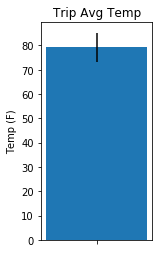

In [52]:
plt.figure(figsize=(2,4))
plt.bar('', avg, 0.02, yerr=(hi-low))
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.show()